This notebook extracted nutrients and tried to mapping HC to those nutrients

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pickle
import re
def drawTree(tagged):
    grammar = r"""
      NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
      PP: {<IN><NP>}               # Chunk prepositions followed by NP
      VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
      CLAUSE: {<NP><VP>}           # Chunk NP, VP
      """
    cp = nltk.RegexpParser(grammar)
    chunked = cp.parse(tagged)
    chunked.draw() 
    
with open('df_hc_res.pickle', 'rb') as handle:
    df_hc_res = pickle.load(handle)
#dataset path
PATH = "F:\colla\Documents\work\GapYear\RA\dataset"

# Extract Nutrients from Approved HC

In [ ]:
# get all nutrients in the approved HC
cat_hc = pd.DataFrame(df_hc_res.groupby('nutrient').apply(lambda x: list(x['hc_ID'])),columns=["approved_hc_ID"])
cat_hc['approved_count'] = [len(l) for l in cat_hc['approved_hc_ID']]
cat_hc.head()

,approved_hc_ID,approved_count
nutrient,,
activated charcoal,[1],1
alpha-cyclodextrin,[31],1
alpha-linolenic acid (ala),[0],1
"alpha-linolenic acid (ala) & linoleic acid (la), essential fatty acids",[254],1
arabinoxylan produced from wheat endosperm,[32],1


In [ ]:
cat_hc.sort_values(by='approved_count',ascending=False).head()

,approved_hc_ID,approved_count
nutrient,,
zinc,"[212, 213, 214, 215, 216, 217, 218, 219, 220, ...",18
vitamin c,"[182, 183, 184, 185, 186, 187, 188, 189, 190, ...",15
calcium,"[12, 13, 14, 15, 16, 17, 18, 19, 237, 250]",10
vitamin d,"[197, 198, 199, 200, 201, 202, 203, 238, 259, ...",10
vitamin b6,"[172, 173, 174, 175, 176, 177, 178, 179, 180, ...",10


In [ ]:
cat_hc['approved_count'].describe()

count    87.00000
mean      3.00000
std       3.36535
min       1.00000
25%       1.00000
50%       1.00000
75%       4.00000
max      18.00000
Name: approved_count, dtype: float64

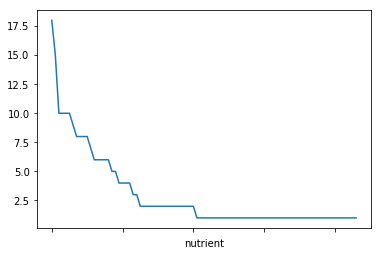

In [ ]:
cat_hc.sort_values(by='approved_count',ascending=False)['approved_count'].plot()

# Mapping Foodmaestro HC to approved nutrients

In [ ]:
FILE = "Foodmaestro - 4200 Health Claims with Product Examples.xlsx"
# data quality issue, has more NaN than EU Register file
df_hc_manu = pd.read_excel('{}/{}'.format(PATH,FILE))
df_hc_manu.columns = ['hc']
df_hc_manu['hc'] = [e.lower().strip()+'.' for e in df_hc_manu['hc']]
df_hc_manu.head()

,hc
0,bones: vitamin d supports normal bones.
1,bones: vitamin d supports the maintenance of n...
2,brain: dha supports normal brain function.
3,calcium & vitamin d support normal bones.
4,dha supports normal brain function.


In [ ]:
df_hc_manu.shape

(4200, 1)

In [ ]:
len(cat_hc.index)

87

In [ ]:
cat_hc.loc[:,'manu_hc_ID'] = [np.where(df_hc_manu.hc.str.contains(i)==True)[0] for i in cat_hc.index] 
cat_hc.loc[:,'manu_count'] = [len(i) for i in cat_hc.manu_hc_ID]
cat_hc.sort_values(by='manu_count',ascending=False).head()

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,approved_hc_ID,approved_count,manu_hc_ID,manu_count
nutrient,,,,
vitamin c,"[182, 183, 184, 185, 186, 187, 188, 189, 190, ...",15,"[54, 92, 101, 104, 105, 106, 111, 118, 136, 14...",513
vitamin d,"[197, 198, 199, 200, 201, 202, 203, 238, 259, ...",10,"[0, 1, 3, 12, 13, 14, 19, 20, 21, 22, 24, 25, ...",483
calcium,"[12, 13, 14, 15, 16, 17, 18, 19, 237, 250]",10,"[3, 42, 61, 80, 81, 82, 83, 84, 92, 101, 113, ...",435
protein,"[124, 125, 126, 258]",4,"[29, 35, 37, 59, 61, 68, 69, 76, 91, 100, 117,...",425
iron,"[73, 74, 75, 76, 77, 78, 79, 256]",8,"[47, 63, 64, 77, 81, 109, 112, 118, 153, 154, ...",363


In [ ]:
df_hc_manu.loc[:,'nutrient'] = [[cat_index for cat_index in cat_hc.index if hc in cat_hc['manu_hc_ID'][cat_index]] for hc in df_hc_manu.index]
df_hc_manu.loc[:,'nutrient_num'] = [len(i) for i in df_hc_manu['nutrient']]
df_hc_manu.head(10)

,hc,nutrient,nutrient_num
0,bones: vitamin d supports normal bones.,[vitamin d],1
1,bones: vitamin d supports the maintenance of n...,[vitamin d],1
2,brain: dha supports normal brain function.,[],0
3,calcium & vitamin d support normal bones.,"[calcium, vitamin d]",2
4,dha supports normal brain function.,[],0
5,dha supports the maintenance of normal vision.,[],0
6,energy: vitamin b3 supports normal energy yiel...,[],0
7,epa & dha support normal heart function.,[],0
8,epa & dha support normal hearth function.,[],0
9,heart: epa & dha support normal heart function.,[],0


In [ ]:
df_hc_manu['nutrient_num'].value_counts()

1    2307
0    1067
2     504
3     231
4      71
5      13
6       6
8       1
Name: nutrient_num, dtype: int64

In [ ]:
cat_hc.describe()

,approved_count,manu_count
count,87.00000,87.000000
mean,3.00000,50.586207
std,3.36535,113.360461
min,1.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,0.000000
75%,4.00000,44.500000
max,18.00000,513.000000


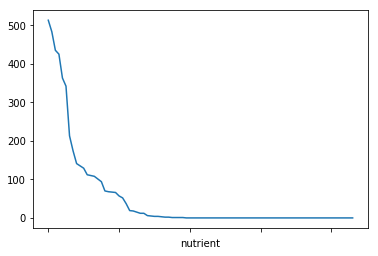

In [ ]:
cat_hc.sort_values(by='manu_count',ascending=False)['manu_count'].plot()

In [ ]:
cat_hc.head()

,approved_hc_ID,approved_count,manu_hc_ID,manu_count
nutrient,,,,
activated charcoal,[1],1,[],0
alpha-cyclodextrin,[31],1,[],0
alpha-linolenic acid (ala),[0],1,[],0
"alpha-linolenic acid (ala) & linoleic acid (la), essential fatty acids",[254],1,[],0
arabinoxylan produced from wheat endosperm,[32],1,[],0


In [ ]:
df_hc_manu.head()

,hc,nutrient,nutrient_num
0,bones: vitamin d supports normal bones.,[vitamin d],1
1,bones: vitamin d supports the maintenance of n...,[vitamin d],1
2,brain: dha supports normal brain function.,[],0
3,calcium & vitamin d support normal bones.,"[calcium, vitamin d]",2
4,dha supports normal brain function.,[],0


In [ ]:
np.where(df_hc_manu.hc.str.contains('ala')==True)[0]

array([  36,   45,   46,   47,   48,   89,   90,   91,   93,  109,  116,
        120,  121,  122,  123,  124,  125,  130,  131,  147,  206,  342,
        343,  397,  414,  505,  519,  520,  521,  539,  549,  550,  568,
        583,  584,  679,  683,  684,  764,  820,  821,  827,  828,  830,
        831,  832,  833,  834,  835,  839,  845,  876,  877,  880,  892,
        893,  942,  985, 1000, 1001, 1006, 1008, 1010, 1011, 1026, 1038,
       1039, 1042, 1046, 1047, 1050, 1059, 1063, 1065, 1068, 1070, 1071,
       1078, 1145, 1146, 1147, 1148, 1150, 1179, 1185, 1186, 1188, 1189,
       1190, 1198, 1208, 1210, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1388, 1435, 1436, 1438, 1496, 1497, 1535, 1538, 1539, 1540, 1541,
       1543, 1556, 1567, 1578, 1579, 1580, 1583, 1602, 1606, 1607, 1609,
       1634, 1635, 1697, 1703, 1708, 1711, 1712, 1713, 1714, 1717, 1729,
       1730, 1732, 1734, 1735, 1737, 1739, 1744, 1747, 1749, 1750, 1751,
       1752, 1754, 1758, 1759, 1760, 1761, 1762, 17

# Export mapping data

In [ ]:
with open('df_hc_manu.pickle', 'wb') as handle:
    pickle.dump(df_hc_manu, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('cat_hc.pickle', 'wb') as handle:
    pickle.dump(cat_hc, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df_hc_res.to_excel('df_hc_res.xlsx')
df_hc_manu.to_excel('df_hc_manu.xlsx')
cat_hc.to_excel('cat_hc.xlsx')

# Extract Nutrients from public sources

## US Nutrients data
https://fdc.nal.usda.gov/download-datasets.html 

In [ ]:
# US nutrients 
df_nu = pd.read_csv('{}/nutrient.csv'.format(PATH), engine='python')

In [ ]:
df_nu


,id,name,unit_name,nutrient_nbr,rank
0,1002,Nitrogen,G,202.0,500.0
1,1003,Protein,G,203.0,600.0
2,1004,Total lipid (fat),G,204.0,800.0
3,1005,"Carbohydrate, by difference",G,205.0,1110.0
4,1007,Ash,G,207.0,1000.0
5,1008,Energy,KCAL,208.0,300.0
6,1009,Starch,G,209.0,2200.0
7,1010,Sucrose,G,210.0,1600.0
8,1011,Glucose (dextrose),G,211.0,1700.0
9,1012,Fructose,G,212.0,1800.0


In [ ]:
def parseNu(n):
    res = []
    for i in n.split(','):
        if len(i) > 0 and i!='c' and i!='t':
            par = re.findall(r'\((.*?)\)', i)
            if par:
                res.extend(par)
                if len(i.split('(')[0].strip())>1:
                    res.append(i.split('(')[0])
            else:
                res.append(i)
#     if len(res)==0:
#         res.append(n)
    res = [r.strip().lower() for r in res]
    res.sort()
    return [r for r in res if not any([w in r for w in ['by','units','from','added','soluble','other','free','label','nlea','aoac']]) and
            r not in [ 'total','alpha','beta','gamma','delta', 'food', 'iu','rae','d2 + d3']] # delete "by xxx" terms
    
df_nu.loc[:,'nutrients'] = [parseNu(n) for n in df_nu.name]
df_nu.loc[:,'alias_count'] = [len(i) for i in df_nu.nutrients]
df_nu.head()

,id,name,unit_name,nutrient_nbr,rank,nutrients,alias_count
0,1002,Nitrogen,G,202.0,500.0,[nitrogen],1
1,1003,Protein,G,203.0,600.0,[protein],1
2,1004,Total lipid (fat),G,204.0,800.0,"[fat, total lipid]",2
3,1005,"Carbohydrate, by difference",G,205.0,1110.0,[carbohydrate],1
4,1007,Ash,G,207.0,1000.0,[ash],1


In [ ]:
parseNu('Vitamin E, ca')

['vitamin e', 'ca']

In [ ]:
parseNu('18:3 n-3 c,c,c (ALA), ca')

['18:3 n-3 c', 'ala', 'ca']

In [ ]:
df_nu.alias_count.value_counts()

1    189
2     46
Name: alias_count, dtype: int64

In [ ]:
len(dict_nu)

245

In [ ]:
dict_nu = {}
for r in list(df_nu.index):
    nu_names = df_nu.nutrients[r]
    for nu_name in nu_names:
        if nu_name in list(dict_nu.keys()):
            dict_nu[nu_name].append(r)
        else:
            dict_nu[nu_name] = [r]
df_nu.loc[:,'temp'] = [''.join(n) for n in df_nu.nutrients]
df_nu = df_nu.drop_duplicates('temp')
df_nu = df_nu.drop(columns = ['temp'])
df_nu.loc[dict_nu['vitamin e']]

,id,name,unit_name,nutrient_nbr,rank,nutrients,alias_count
56,1109,Vitamin E (alpha-tocopherol),MG,323.0,7905.0,"[alpha-tocopherol, vitamin e]",2
69,1124,Vitamin E (label entry primarily),IU,340.0,999999.0,[vitamin e],1


In [ ]:
df_nu[df_nu['alias_count']==2]

,id,name,unit_name,nutrient_nbr,rank,nutrients,alias_count
2,1004,Total lipid (fat),G,204.0,800.0,"[fat, total lipid]",2
8,1011,Glucose (dextrose),G,211.0,1700.0,"[dextrose, glucose]",2
12,1018,"Alcohol, ethyl",G,221.0,18200.0,"[alcohol, ethyl]",2
28,1079,"Fiber, total dietary",G,291.0,1200.0,"[fiber, total dietary]",2
34,1087,"Calcium, Ca",MG,301.0,5300.0,"[ca, calcium]",2
35,1088,"Chlorine, Cl",MG,302.0,999999.0,"[chlorine, cl]",2
36,1089,"Iron, Fe",MG,303.0,5400.0,"[fe, iron]",2
37,1090,"Magnesium, Mg",MG,304.0,5500.0,"[magnesium, mg]",2
38,1091,"Phosphorus, P",MG,305.0,5600.0,"[p, phosphorus]",2
39,1092,"Potassium, K",MG,306.0,5700.0,"[k, potassium]",2


In [ ]:
df_biName = pd.DataFrame(list(df_nu[df_nu['alias_count']==2].nutrients),columns=['name2','name1'])
df_biName = df_biName[['name1','name2']]
df_biName = df_biName.sort_values(by='name1')
df_biName = df_biName.reset_index(drop=True)
df_biName

,name1,name2
0,10hcofa,10-formyl folic acid
1,18:1t n-7,18:1-11 t
2,5-hcoh4,5-formyltetrahydrofolic acid
3,5-mthf,5-methyl tetrahydrofolate
4,ala,18:3 n-3 c
5,boron,b
6,calcium,ca
7,cl,chlorine
8,cobalt,co
9,cr,chromium


In [ ]:
pd.DataFrame(list(df_nu[df_nu['alias_count']==1].nutrients),columns=['name']).to_csv('nutrient_single.csv',index=None)

In [ ]:
df_biName.to_csv('nutrient_alias.csv', index=None)

In [ ]:
df_nu.to_csv('nutrient_uk.csv', index=None)

In [ ]:
with open('df_nu.pickle', 'wb') as handle:
    pickle.dump(df_nu, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
'carbohydrate, by difference'.capitalize() 

'Carbohydrate, by difference'

## UK Nutrient data

In [ ]:
# UK nutrients data
# https://www.gov.uk/government/publications/composition-of-foods-integrated-dataset-cofid
df_uknu_raw = pd.read_excel(PATH +'/UKGOV-McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2019.xlsx', sheet_name = None, header=None)

In [ ]:
df_uknu = pd.DataFrame()
for s in df_uknu_raw:
    if len(df_uknu_raw[s].columns) > 12:
        df_uknu = pd.concat([df_uknu, df_uknu_raw[s].iloc[:3,7:].T]).reset_index(drop=True)
df_uknu.columns = ['nutrients','n1','n2']
nu,unit = [],[]
for i in df_uknu.nutrients:
    nu.append(re.findall(r'(.*?) \(.*?\)', i)[0].lower().strip())  
    unit.append(re.findall(r'\((.*?)\)', i)[0].upper())
df_uknu.nutrients = nu
df_uknu.loc[:,'unit'] = unit
df_uknu.n1 = df_uknu.n1.astype(str)
df_uknu.n2 = df_uknu.n2.astype(str)
df_uknu = df_uknu.drop_duplicates('nutrients').reset_index(drop=True)
df_uknu.head()

,nutrients,n1,n2,unit
0,water,WATER,Water,G
1,total nitrogen,TOTNIT,Total nitrogen,G
2,protein,PROT,Protein,G
3,fat,FAT,Fat,G
4,carbohydrate,CHO,Carbohydrate,G


In [ ]:
# combine nutrients and alias into list
list_uknus = []
for i in df_uknu.index:
    lst = [df_uknu.nutrients[i]]
    n1 = df_uknu.n1[i].lower().strip()
    n2 = df_uknu.n2[i].lower().strip()
    if df_uknu.nutrients[i]!=n1:
        lst.append(df_uknu.n1[i].lower())
    if df_uknu.nutrients[i]!=n2 and n1!=n2:
        lst.append(df_uknu.n2[i].lower())
    list_uknus.append(lst)

In [ ]:
df_uknu = df_uknu.iloc[:,[0]]
df_uknu['name'] = df_uknu['nutrients']
df_uknu.loc[:,'nutrients'] = list_uknus
df_uknu.loc[:,'nu_num'] = [len(i) for i in df_uknu.nutrients]
df_uknu.head()

,nutrients,name,nu_num
0,[water],water,1
1,"[total nitrogen, totnit]",total nitrogen,2
2,"[protein, prot]",protein,2
3,[fat],fat,1
4,"[carbohydrate, cho]",carbohydrate,2


In [ ]:
df_uknu.nu_num.value_counts()

3    204
2     66
1      2
Name: nu_num, dtype: int64

In [ ]:
df_uknu.shape

(272, 3)

In [ ]:
dict_uknu = {}
for r in list(df_uknu.index):
    nu_names = df_uknu.nutrients[r]
    for nu_name in nu_names:
        if nu_name in list(dict_uknu.keys()):
            dict_uknu[nu_name].append(r)
        else:
            dict_uknu[nu_name] = [r]

In [ ]:
len(dict_uknu),len(dict_nu)

(744, 254)

In [ ]:
with open('df_uknu.pickle', 'wb') as handle:
    pickle.dump(df_uknu, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Combine UK+US Nutrients Data

In [ ]:
dict_nu_all = dict_uknu.copy()
for i in dict_nu:
    dict_nu_all[i] = 0 
len(dict_nu_all)

941

In [ ]:
df_nu_all = pd.DataFrame(pd.Series(list(dict_nu_all.keys())),columns=['nutrient'])
df_nu_all.head()

,nutrient
0,water
1,total nitrogen
2,totnit
3,protein
4,prot


In [ ]:
# import dict_nu data
dict_nu_all = {}
for r in list(df_nu.index):
    nu_names = df_nu.nutrients[r]
    for nu_name in nu_names:
        nu_id = list(df_nu_all.index[df_nu_all['nutrient']==nu_name])[0]
        if nu_name in list(dict_nu_all.keys()):
            if nu_id not in dict_nu_all[nu_name]:
                dict_nu_all[nu_name].append(nu_id)
        else:
            dict_nu_all[nu_name] = [nu_id]
len(dict_nu_all)

254

In [ ]:
# combine dict_uknu data
for r in list(df_uknu.index):
    nu_names = df_uknu.nutrients[r]
    for nu_name in nu_names:
        nu_id = list(df_nu_all.index[df_nu_all['nutrient']==nu_name])[0]
        if nu_name in list(dict_nu_all.keys()):
            if nu_id not in dict_nu_all[nu_name]:
                dict_nu_all[nu_name].append(nu_id)
        else:
            dict_nu_all[nu_name] = [nu_id]
len(dict_nu_all)

941

In [ ]:
#土方法
res = []
extra = []
for nus in df_nu.nutrients:
    for nu in nus:
        for uknus in df_uknu.nutrients:
            for uknu in uknus:
                if uknu == nu:
                    nus.extend(uknus)
                    break
                else:
                    extra.append(uknu)
    res.append(nus)
            

In [ ]:
with open('df_nu.pickle', 'rb') as handle:
    df_nu = pickle.load(handle)
with open('df_uknu.pickle', 'rb') as handle:
    df_uknu = pickle.load(handle)

In [ ]:
df_nu_lst = df_nu.drop_duplicates('name').iloc[:,[5,2,6]].reset_index(drop=True)

In [ ]:
df_nu_lst.shape

(234, 3)

In [ ]:
comb_nu = {}
for i in df_uknu.index:
    for n in df_uknu.nutrients[i]:
        comb_nu[n] = [i,'']
    

In [ ]:
for i in df_nu_lst.index:
    for n in df_nu_lst.nutrients[i]:
        if n in comb_nu.keys():
            comb_nu[n][1] = i
        else:
            comb_nu[n] = ['',i]

In [ ]:
us_new = {}
for k,v in comb_nu.items():
    if v[0]=='':
#         print(k,v)
        if v[1] not in us_new.keys():
            us_new[v[1]] = [k]
        else:
            us_new[v[1]].append(k)

In [ ]:
df_usnu = pd.DataFrame(pd.Series(us_new),columns=['nutrients'])
df_usnu.loc[:,'nu_num'] = [len(i) for i in df_usnu.nutrients]
df_usnu.head()

,nutrients,nu_num
0,[nitrogen],1
2,[total lipid],1
4,[ash],1
8,[dextrose],1
12,[ethyl],1


In [ ]:
df_usnu.shape,df_uknu.iloc[:,[0,2]].shape

((176, 2), (272, 2))

In [ ]:
df_comb = pd.concat([df_uknu.iloc[:,[0,2]],df_usnu]).reset_index(drop=True)
df_comb.head()

,nutrients,nu_num
0,[water],1
1,"[total nitrogen, totnit]",2
2,"[protein, prot]",2
3,[fat],1
4,"[carbohydrate, cho]",2


In [ ]:
df_comb.nu_num.value_counts()

3    204
1    157
2     87
Name: nu_num, dtype: int64

In [ ]:
df_comb.iloc[18,0]

['satd fa /100g fa', 'satfac', 'saturated fatty acids per 100g fatty acids']

In [ ]:
with open('df_comb_nu.pickle', 'wb') as handle:
    pickle.dump(df_comb, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df_uknu.nutrients[0]

['water']

In [ ]:
df_nu_lst.nutrients[19]

['water']

In [ ]:
df_nu_comb = pd.DataFrame.merge(df_uknu, df_nu.iloc[:,[1,2]], how='outer', suffixes=('_uk', '_us'),left_on='nutrients',right_on='name',indicator=True)
df_nu_comb.head()

,nutrients,unit,name,unit_name,_merge
0,Water,G,Water,G,both
1,Total nitrogen,G,NaN,NaN,left_only
2,Protein,G,Protein,G,both
3,Fat,G,NaN,NaN,left_only
4,Carbohydrate,G,NaN,NaN,left_only


In [ ]:
df_nu_comb._merge.value_counts()

left_only     249
right_only    211
both           26
Name: _merge, dtype: int64

In [ ]:
nu_all = [n for e in df_nu.nutrients for n in e]
len(nu_all)

323

In [ ]:
uk_nu = []
for i in df_nu_comb[df_nu_comb._merge=='left_only'].nutrients:
    if i not in nu_all:
        uk_nu.append(i)

In [ ]:
len(df_nu_comb[df_nu_comb._merge=='left_only'].nutrients),len(uk_nu)

(249, 249)

In [ ]:
len(dict_nu)

248